In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# View the train_df
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# View the test_df
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [7]:
# Count number of missing values in train_df
for col in train_df.columns.tolist():
    print('{} column missing values: {}'.format(col, train_df[col].isnull().sum()))

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


In [8]:
# Count number of missing values in test_df
for col in test_df.columns.tolist():
    print('{} column missing values: {}'.format(col, test_df[col].isnull().sum()))

PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0


<AxesSubplot:>

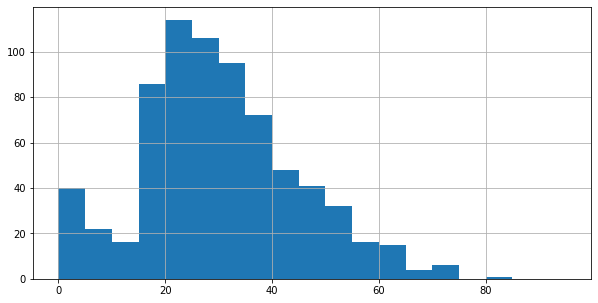

In [9]:
# Plot the distribution of age
age_values = np.arange(start=0, stop=100, step=5)
train_df['Age'].hist(bins=age_values, figsize=[10,5])

In [10]:
# Find the correlation coefficent of Age against other variables (train_df)
train_df[train_df.columns[:]].corr()['Age']

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Name: Age, dtype: float64

In [11]:
# Find the correlation coefficient of Age against other variables (test_df)
test_df[test_df.columns[:]].corr()['Age']

PassengerId   -0.034102
Pclass        -0.492143
Age            1.000000
SibSp         -0.091587
Parch         -0.061249
Fare           0.337932
Name: Age, dtype: float64

In [12]:
# Calculate the median age grouped by passenger class
per_pclass_age = train_df.groupby(['Pclass']).median()['Age']
per_pclass_age_df = pd.DataFrame({"Median Age": per_pclass_age})

per_pclass_age_df

,Median Age
Pclass,
1,37.0
2,29.0
3,24.0


In [13]:
# Impute median ages in the training dataframe
train_frames = []
for i in list(set(train_df['Pclass'])):
    train_df_pclass = train_df[train_df['Pclass'] == i]
    train_df_pclass['Age'].fillna(train_df_pclass['Age'].median(),inplace=True)
    train_frames.append(train_df_pclass)
    new_train_df = pd.concat(train_frames)

# Check that all age missing values were imputed
print(new_train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [14]:
# Impute median ages in the testing dataframe
test_frames = []
for i in list(set(test_df['Pclass'])):
    test_df_pclass = test_df[test_df['Pclass'] == i]
    test_df_pclass['Age'].fillna(train_df_pclass['Age'].median(),inplace=True)
    test_frames.append(test_df_pclass)
    new_test_df = pd.concat(test_frames)

# Check that all age missing values were imputed
print(new_test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [15]:
# Find the correlation coefficent of Fare against other variables (train_df)
new_train_df[train_df.columns[:]].corr()['Fare']

PassengerId    0.012658
Survived       0.257307
Pclass        -0.549500
Age            0.123784
SibSp          0.159651
Parch          0.216225
Fare           1.000000
Name: Fare, dtype: float64

In [16]:
# Find the correlation coefficient of Fare against other variables (test_df)
new_test_df[test_df.columns[:]].corr()['Fare']

PassengerId    0.008211
Pclass        -0.577147
Age            0.360044
SibSp          0.171539
Parch          0.230046
Fare           1.000000
Name: Fare, dtype: float64

In [17]:
# Null Fare row
null_fare = new_test_df[new_test_df['Fare'].isnull()]
null_fare

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [18]:
# Calculate the mean fare grouped by passenger class
per_pclass_fare = new_train_df.groupby(['Pclass']).mean()['Fare']
per_pclass_fare_df = pd.DataFrame({"Average Fare": per_pclass_fare})

per_pclass_fare_df

,Average Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [19]:
# Impute the missing Fare value with the average third class fare
new_test_df['Fare'] = new_test_df['Fare'].fillna(13.6756)

In [20]:
# Replacing missing Cabin values with "Missing"
new_train_df['Cabin'] = new_train_df['Cabin'].fillna('Missing')
new_test_df['Cabin'] = new_test_df['Cabin'].fillna('Missing')

In [21]:
# Null Embarked rows
null_embarked = new_train_df[new_train_df['Embarked'].isnull()]
null_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
# Impute the missing Embarked values with "S"
new_train_df['Embarked'] = new_train_df['Embarked'].fillna('S')

In [23]:
# Check that there are no missing values for the new training dataframe
for col in new_train_df.columns.tolist():
    print('{} column missing values: {}'.format(col, new_train_df[col].isnull().sum()))

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 0
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 0
Embarked column missing values: 0


In [24]:
# Check that there are no missing values for the new test dataframe
for col in new_test_df.columns.tolist():
    print('{} column missing values: {}'.format(col, new_test_df[col].isnull().sum()))

PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 0
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 0
Embarked column missing values: 0


<AxesSubplot:>

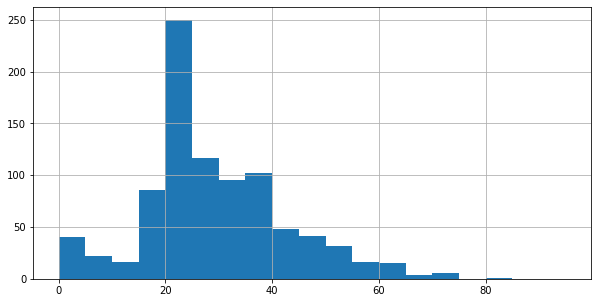

In [25]:
# View the age distribution
age_values = np.arange(start=0, stop=100, step=5)
new_train_df['Age'].hist(bins=age_values, figsize=[10,5])

In [26]:
# Bin the new training dataframe ages
age_bins = [0, 17, 24, 44, 64, np.inf]
age_names = ['0-17 years', '18-24 years', '25-44 years', '45-64 years', '65+ years']
new_train_df['Age'] = pd.cut(new_train_df['Age'], age_bins, labels=age_names)
new_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,25-44 years,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,25-44 years,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,45-64 years,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,45-64 years,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,25-44 years,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,18-24 years,0,0,7552,10.5167,Missing,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25-44 years,0,0,SOTON/OQ 392076,7.0500,Missing,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,25-44 years,0,5,382652,29.1250,Missing,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18-24 years,1,2,W./C. 6607,23.4500,Missing,S


In [27]:
# Bin the new testing dataframe ages
new_test_df['Age'] = pd.cut(new_test_df['Age'], age_bins, labels=age_names)
new_test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,903,1,"Jones, Mr. Charles Cresson",male,45-64 years,0,0,694,26.0000,Missing,S
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,18-24 years,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,45-64 years,1,0,W.E.P. 5734,61.1750,E31,S
20,912,1,"Rothschild, Mr. Martin",male,45-64 years,1,0,PC 17603,59.4000,Missing,C
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,18-24 years,0,0,PC 17598,31.6833,Missing,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,25-44 years,0,0,347086,7.7750,Missing,S
413,1305,3,"Spector, Mr. Woolf",male,18-24 years,0,0,A.5. 3236,8.0500,Missing,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,25-44 years,0,0,SOTON/O.Q. 3101262,7.2500,Missing,S
416,1308,3,"Ware, Mr. Frederick",male,18-24 years,0,0,359309,8.0500,Missing,S


In [28]:
# Create Deck column from Cabin column (training dataset)
new_train_df = new_train_df.assign(Deck = new_train_df['Cabin'].str[:1])
new_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,25-44 years,1,0,PC 17599,71.2833,C85,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,25-44 years,1,0,113803,53.1000,C123,S,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,45-64 years,0,0,17463,51.8625,E46,S,E
11,12,1,1,"Bonnell, Miss. Elizabeth",female,45-64 years,0,0,113783,26.5500,C103,S,C
23,24,1,1,"Sloper, Mr. William Thompson",male,25-44 years,0,0,113788,35.5000,A6,S,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,18-24 years,0,0,7552,10.5167,Missing,S,M
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25-44 years,0,0,SOTON/OQ 392076,7.0500,Missing,S,M
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,25-44 years,0,5,382652,29.1250,Missing,Q,M
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18-24 years,1,2,W./C. 6607,23.4500,Missing,S,M


In [29]:
# Create Deck column from Cabin column (testing dataset)
new_test_df = new_test_df.assign(Deck = new_test_df['Cabin'].str[:1])
new_test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
11,903,1,"Jones, Mr. Charles Cresson",male,45-64 years,0,0,694,26.0000,Missing,S,M
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,18-24 years,1,0,21228,82.2667,B45,S,B
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,45-64 years,1,0,W.E.P. 5734,61.1750,E31,S,E
20,912,1,"Rothschild, Mr. Martin",male,45-64 years,1,0,PC 17603,59.4000,Missing,C,M
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,18-24 years,0,0,PC 17598,31.6833,Missing,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,25-44 years,0,0,347086,7.7750,Missing,S,M
413,1305,3,"Spector, Mr. Woolf",male,18-24 years,0,0,A.5. 3236,8.0500,Missing,S,M
415,1307,3,"Saether, Mr. Simon Sivertsen",male,25-44 years,0,0,SOTON/O.Q. 3101262,7.2500,Missing,S,M
416,1308,3,"Ware, Mr. Frederick",male,18-24 years,0,0,359309,8.0500,Missing,S,M


In [30]:
deck_df = new_train_df.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).reset_index()
deck_df

,Deck,Pclass,Count
0,A,1,15
1,B,1,47
2,C,1,59
3,D,1,29
4,D,2,4
5,E,1,25
6,E,2,4
7,E,3,3
8,F,2,8
9,F,3,5


In [31]:
deck_df = deck_df.pivot(index='Deck', columns='Pclass', values='Count')
deck_df

Pclass,1,2,3
Deck,,,
A,15.0,NaN,NaN
B,47.0,NaN,NaN
C,59.0,NaN,NaN
D,29.0,4.0,NaN
E,25.0,4.0,3.0
F,NaN,8.0,5.0
G,NaN,NaN,4.0
M,40.0,168.0,479.0
T,1.0,NaN,NaN


In [32]:
deck_df = deck_df.div(deck_df.sum(axis=1), axis=0).multiply(100).round(1)
deck_df

Pclass,1,2,3
Deck,,,
A,100.0,NaN,NaN
B,100.0,NaN,NaN
C,100.0,NaN,NaN
D,87.9,12.1,NaN
E,78.1,12.5,9.4
F,NaN,61.5,38.5
G,NaN,NaN,100.0
M,5.8,24.5,69.7
T,100.0,NaN,NaN


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'M'),
  Text(8, 0, 'T')])

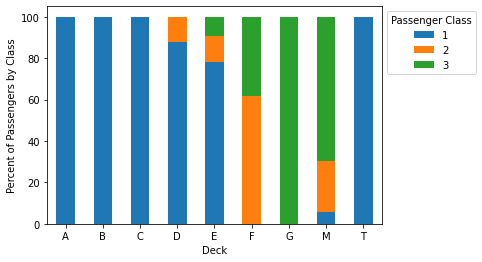

In [33]:
deck_df.plot.bar(stacked=True)
plt.legend(title='Passenger Class', loc='upper left', bbox_to_anchor=(1,1))
plt.xlabel('Deck')
plt.ylabel('Percent of Passengers by Class')
plt.xticks(rotation=0)

In [34]:
# Import machine learning dependencies
from sklearn.linear_model import LogisticRegression

In [35]:
# Create target variable and features
y = new_train_df['Survived']

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = pd.get_dummies(new_train_df[features])
X_test = pd.get_dummies(new_test_df[features])

In [36]:
# Use StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaler = scaler.fit(X)

X_train_scaled = X_scaler.transform(X)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
# Create logistic regression model
model = LogisticRegression(solver='liblinear', max_iter=200, random_state=1)

In [38]:
# Train the model with training data
model.fit(X_train_scaled, y)

LogisticRegression(max_iter=200, random_state=1, solver='liblinear')

In [39]:
# Have the model run predictions on the test data
predictions = model.predict(X_test_scaled)

In [40]:
# Output
output = pd.DataFrame({'PassengerId': new_test_df.PassengerId, 'Survived': predictions})
output

,PassengerId,Survived
11,903,0
12,904,1
14,906,1
20,912,0
22,914,1
...,...,...
412,1304,1
413,1305,0
415,1307,0
416,1308,0


In [41]:
# Export to csv
output.to_csv('log_reg_submission.csv', index=False)
# Accuracy Score: 